## Importing and setting up our data

We start by bringing in the CSV data into Python program.
We then parse the data using the CSV package.
Lastly we close the CSV file after we have read the information.

In [1]:
import matplotlib.pyplot as plt
import csv
import datetime
import calendar

In [2]:
with open('covid_19_data.csv', 'r') as datafile:
    covid_data = csv.DictReader(datafile)
    data_list = []
    
    for row in covid_data:
        data_list.append(row)

In [3]:
data_list[0]

{'SNo': '1',
 'ObservationDate': '01/22/2020',
 'Province/State': 'Anhui',
 'Country/Region': 'Mainland China',
 'Last Update': '1/22/2020 17:00',
 'Confirmed': '1.0',
 'Deaths': '0.0',
 'Recovered': '0.0'}

## Format the data before we generate a visualization

Choose only the US entries, categorize by State, collect daily reports into a monthly list.

In [10]:
us_data = {}
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

for item in data_list:
    month, day, year = tuple(item['ObservationDate'].split('/'))
    if item['Country/Region'] == "US" and item['Province/State'] in state_names:
        if not us_data.get(item['Province/State']):
            us_data[item['Province/State']] = {}
        if not us_data[item['Province/State']].get(calendar.month_name[int(month)]):
            us_data[item['Province/State']][calendar.month_name[int(month)]] = []
        entry = {
            'cumulative_cases': item['Confirmed']
        }
        us_data[item['Province/State']][calendar.month_name[int(month)]].append(entry)

## Create the Visualization

Now that the data is parsed, we will use matplotlib to create a graph.

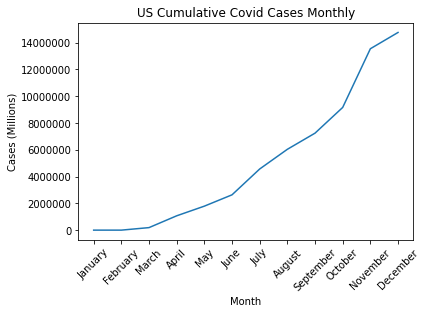

In [26]:
plt.title("US Cumulative Covid Cases Monthly")
plt.xlabel('Month')
plt.ylabel('Cases (Millions)')

# TODO: Create x axis MONTHS list
x = [calendar.month_name[potato] for potato in range(1, 13)]

# TODO: Create y axis Cumulative list
y = []

for month in x:
    total_for_month = 0
    for state in state_names:
        if us_data[state].get(month):
            last_value = int(float(us_data[state][month][-1]['cumulative_cases']))
            total_for_month += last_value
    y.append(total_for_month)

plt.xticks(rotation=45)
plt.ticklabel_format(axis='y', style='plain')
plt.plot(x,y, fillstyle='bottom')